In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
# Image folder path
image_folder = '/content/drive/My Drive/Image Analysis/imageset2/'

# Image file names
image_files = ['1.jpg', '2.jpg', '3.jpg', '4.jpg', '5.jpg', '6.jpg', '7.jpg', '8.jpg','9.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg','17.jpg', '18.jpg', '19.jpg','20.jpg']

In [21]:
# Load ResNet50 model pre-trained on ImageNet without the top layers
base_model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = base_model.predict(img_data)
    return features.flatten()



94765736/94765736 [==============================] - 1s 0us/step


In [22]:
# Extract features
features = []
for file in image_files:
    features.append(extract_features(os.path.join(image_folder, file)))
features = np.array(features)

1/1 [==============================] - 0s 320ms/step


In [23]:
# Scale the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [31]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=2, min_samples=1)  # Adjust eps and min_samples as needed
dbscan_labels = dbscan.fit_predict(features_scaled)

# Print clustering labels
print("DBSCAN clustering labels:", dbscan_labels)

DBSCAN clustering labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


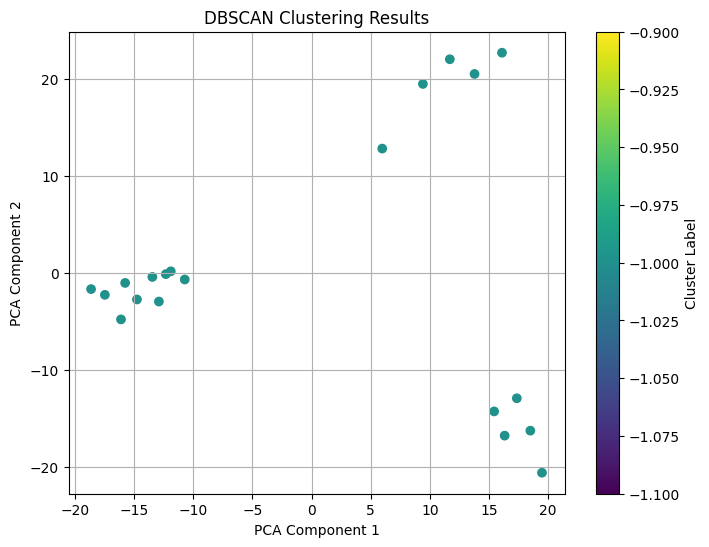

In [17]:
pca = PCA(n_components=2)
features_reduced = pca.fit_transform(features_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(features_reduced[:, 0], features_reduced[:, 1], c=dbscan_labels, cmap='viridis', marker='o')
plt.colorbar(scatter, label='Cluster Label')
plt.title('DBSCAN Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid()
plt.show()